# Challenges in Supply-Chain-Management: Sentiment Analysis of Job Reviews
---
## 1. Introduction
The modern business landscape is more competitive than ever, with organizations constantly seeking an edge to differentiate themselves and better serve their clients. One area of increasing importance in this pursuit is understanding and improving employee satisfaction. Employee reviews are a gold mine of data, rich with insights about the working environment, company culture, benefits, growth opportunities, and more. For any business, leveraging this data can provide valuable feedback, helping to enhance the work environment and drive success.

The aim of this project is to harness the power of AI and Natural Language Processing (NLP) techniques to analyze job reviews for BASF, one of the world's largest chemical producers. More specifically, we focus on an aspect of NLP known as Sentiment Analysis, aiming to understand the underlying sentiments of employees towards the company.

We are particularly motivated to apply the cutting-edge Generative AI methods in this analysis, as these tools have proven to be efficient and effective in identifying patterns and trends in complex datasets, such as textual reviews. It also aligns the principles of Supply Chain Management, or even more specific, the human resource is part of it.

Our analysis is based on a dataset containing job reviews written in German. The dataset includes several fields for each review, including the title of the review, the date and job title of the reviewer, an overall rating, and free-text fields for the pros and cons of the job.

This project aims to provide actionable insights that can help BASF to improve its working conditions, employee satisfaction, and ultimately, business success. It is our hope that the methodologies developed here can also be applied to other organizations, empowering them to better understand and act on employee feedback.

## 2. Data Understanding and Preprocessing

In any data analysis task, the initial step is to understand and preprocess the data, and our project is no different. The data we are working with is an extensive collection of job reviews in German, from employees at BASF. The 'Data Understanding and Preprocessing' stage of our project is therefore crucial for shaping our raw data into a form that is suitable for analysis.

Data understanding involves getting to know our dataset, including its size, the type of data we have, the presence of any missing or inconsistent data, and the distribution of data across various categories. This is crucial in identifying any potential issues that might affect the quality of our results or require special handling.

Once we have a thorough understanding of our data, we move on to data preprocessing, the process of cleaning and transforming the raw data to prepare it for analysis. In the case of text data, preprocessing often involves removing unnecessary or redundant information, standardizing the format of the data, and transforming the text into a form that can be easily processed by our analysis tools. For our project, this includes tasks like TF-IDF vectorization and transforming the text into unigrams and bigrams.

Our goal in this stage is to ensure that our data is in the best possible form for the subsequent sentiment analysis. By investing time and effort in understanding and preprocessing our data, we can ensure the quality and reliability of our results, and maximize the insights we can derive from our analysis.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import matplotlib.dates as mdates

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
from spacy.lang.de import German
import string
import datetime
import dateparser
import tensorflow as tf
import torch
import calendar
import re
import openai
from gensim import corpora, models
from gensim.models import CoherenceModel, LdaMulticore
from textblob_de import TextBlobDE
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud

# Set a color palette for all plots
sns.set_palette(sns.color_palette(['#FF7F50']))
# For reproducibility
np.random.seed(42)

### Data Loading

In this section, we import the dataset from our source (we performed web scraping fomr the job review platforms glassdoor, stepstone and indeed) and load it into our Python environment, laying the groundwork for our exploratory data analysis and preprocessing tasks. We also have a first look how the raw data looks like.

In [2]:
df_1 = pd.read_csv('./data/dataset1_german_187.csv', delimiter=';')

df_1.drop(columns=['Column1'], inplace=True)
df_1.head()

,title,author_info,rating,pros,cons
0,Super,5. Mai 2023 - Chemikant und Anlagenfahrer,5,"Gutes Gehalt, gute Arbeitszeit, gute Kollegen,...",Ein riesiger laden etwas zu groß für mich
1,Verbesserungsvorschläge für eine noch bessere ...,20. Mai 2023 - Anlagenmechaniker,4,Globale Präsenz: BASF ist ein multinationaler ...,Größe und Komplexität: Als globaler Konzern mi...
2,"Gutes Gehalt, flexible Zeiten",23. Mai 2023 - Industriemechaniker,4,Das Einstiegsgehalt ist für einen Ausbildungsb...,Aufstiegsmöglichkeiten aufgrund der hohen Meng...
3,"Nettes Team, gute Erfahrung",16. Mai 2023 - Werkstudent,3,"Team, Einblicke, Support... Es hat Spaß gemach...",Die Organisation hat zeitweilig zu wünschen üb...
4,Führen durch Intransparenz,5. Mai 2023 - Ingenieur,2,Kündigungsschutz (betrieblich bedingt) von 5 J...,"Management, Führungskräfte und das gesamte Sys..."


In [3]:
df_2 = pd.read_csv('./data/dataset2_german_88_stepstone.csv', delimiter=';', encoding='iso-8859-1')
df_2.head(2)

,title,author_info,rating,pros,cons,date
0,Arbeiten bei einem der besten Arbeitgeber Deut...,"Mitarbeiter im Bereich Anonym in Lampertheim, ...",5.0,Das sehr positive Arbeitsumfeld mit sehr stark...,"Die Work-Life-Balance ist Top, das Gehalt ist ...",15.10.2020
1,Geld ist nicht alles,"Mitarbeiter im Bereich Logistik in Hamm, Deuts...",1.0,Sehr Gutes Gehalt. Wäre das Gehalt nicht so ho...,Menschlichkeit. Man ist dort nur eine nr. Nr k...,2021


In [4]:
df_3 = pd.read_csv('./data/dataset3_german_68_indeed.csv', delimiter=';', encoding='iso-8859-1')
df_3.drop('Unnamed: 4', axis=1, inplace=True)
df_3.head(2)

,title,author_info,rating,review
0,"Toller Arbeitgeber, spannendes Tätigkeitsfeld,...",Mechatroniker (Derzeitiger Mitarbeiter) - Anla...,4.0,Diese Bewertung der Unternehmens erfolgt aus m...
1,Lasst es...,koch (Ehemaliger Mitarbeiter) - Ludwigshafen a...,1.0,Arroganz und Ignoranz made by BASF Gastronomie...


In [5]:
# How much reviews do we have and how many different columns?
print("Shape of Glassdoor Data:", df_1.shape)
print("Shape of Stepstone Data:", df_2.shape)
print("Shape of Indeed Data:", df_3.shape)

Shape of Glassdoor Data: (187, 5)
Shape of Stepstone Data: (91, 6)
Shape of Indeed Data: (67, 4)


In [6]:
# Create the 'plots' directory if it doesn't exist to save plots
if not os.path.exists('plots'):
    os.makedirs('plots')

The raw data we have at our disposal comes in the form of CSV files, containing 187, 91 and 87 distinct job reviews from employees at BASF, filtered for reviews in German. Our CSV files is organized into different columns: the title of the review, the author's information (including date and job title), an overall rating, and two text fields named 'pros' and 'cons', where employees have listed positive and negative aspects of their job experiences, respectively. However, we see that we have a quite different structure for the other two dataframes. So in the next step, we will bring the data in a unified format.

### Data Cleaning

Next, we start by structuring and refining the raw data to make it more suitable for analysis and combine all three datasources into a single dataframe. We split the 'author_info' column into two separate columns: 'Date' and 'Job', which holds the timestamp of the review and the position of the reviewer respectively. This is followed by converting the 'Date' column to datetime format to ensure consistency in our data.

Leading and trailing whitespaces, which can introduce errors and inconsistencies in our analysis, are then removed from all columns. To ensure data integrity, we check for missing values and duplicates and delete those duplicates as they do not add any value to our analysis. We see that we have some missing values in some columns like sometimes there is no date or the indeed job base has no separate text fields for pros and cons in general. Since we can't impute those values, one way to handle them would be to delete those reviews which contain a missing value. However, this would result in an information loss. Therefore we will just handle the missing values separately in each analysis, because sometimes we do not need the date for a specific analysis and want to keep the other information therefore whereas sometimes we are just investigating the rating and time and do not need the pros and cons content for example. 

Then we are also ensuring that all our text columns are of the correct string data type, which is crucial for the text processing steps that follow.

We then combine the 'title', 'pros', and 'cons' columns into a single 'text' column to create a holistic view of each review. Additionally, we compute and store the length of each review and the length of the pros and cons individually. This could provide interesting insights into the depth of positive and negative sentiment expressed in the reviews.

In [7]:
# Bring the first dataframe into the right format

# Split the 'author_info' column into 'Date' and 'Job' columns
df_1[['date', 'job']] = df_1['author_info'].str.split('-', 1, expand=True)
# Fill missing values with an empty string
df_1['pros'] = df_1['pros'].fillna('')
df_1['cons'] = df_1['cons'].fillna('')
# Create a variable for the whole review containing pros and cons
df_1['review'] = df_1['pros'] + ' ' + df_1['cons']
# Create a variable for the source
df_1['platform'] = 'glassdoor'
# Delete uneccessary column
df_1.drop(['author_info'], axis=1, inplace=True)
# Convert the Date column to datetime format
df_1['date'] = df_1['date'].apply(lambda x: dateparser.parse(x, languages=['de']))
# Remove leading and trailing whitespaces from all columns
df_1 = df_1.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
df_1.isnull().sum()

title       0
rating      0
pros        0
cons        0
date        0
job         0
review      0
platform    0
dtype: int64

In [9]:
# Bring the second dataframe into the right format

# Build a function that can handle the different data types
def custom_date_parser(date_str):
    if pd.isnull(date_str):
        return None
    
    # Remove leading or trailing whitespaces and replace non-visible characters
    date_str = date_str.strip().replace('\n', '').replace('\r', '').replace('\t', '')

    # Try to convert the full date format
    try:
        return pd.to_datetime(date_str, format='%d.%m.%Y')
    except ValueError:
        pass  # Go to the next format

    # Try to convert year only format
    try:
        return pd.to_datetime(date_str, format='%Y')
    except ValueError:
        return None  # Return None if the date string can't be converted

# Apply the function to the date column
df_2['date'] = df_2['date'].apply(custom_date_parser)
# Remove non-breaking spaces
df_2.replace('\xa0', ' ', regex=True, inplace=True)
# Remove leading and trailing whitespaces from all columns
df_2 = df_2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Fill missing values with an empty string
df_2['pros'] = df_2['pros'].fillna('')
df_2['cons'] = df_2['cons'].fillna('')
# Create a variable for the whole review containing pros and cons
df_2['review'] = df_2['pros'] + ' ' + df_2['cons']
# Create a variable for the source
df_2['platform'] = 'stepstone'
# Delete uneccessary column
df_2.drop(['author_info'], axis=1, inplace=True)

In [10]:
df_2.isnull().sum()

title       0
rating      0
pros        0
cons        0
date        0
review      0
platform    0
dtype: int64

In [11]:
# Process df_3

# Define function to extract date
def extract_date(author_info):
    match = re.search(r'\d{1,2}\. \w+ \d{2,4}', author_info)
    if match:
        return dateparser.parse(match.group(), languages=['de'])
    else:
        return None

# Apply the function to the author_info column
df_3['date'] = df_3['author_info'].apply(extract_date)

def extract_job(author_info):
    match = re.search(r'(.*)\s-\s.*\d{2,4}', author_info)
    if match:
        return match.group(1).strip()
    else:
        return author_info  # Return the original string if no date is found

# Apply the function to the author_info column
df_3['job'] = df_3['author_info'].apply(extract_job)
# Create a variable for the source
df_3['platform'] = 'indeed'
# Drop uneccessary column
df_3 = df_3.drop(['author_info'], axis=1)
# Remove leading and trailing whitespaces from all columns
df_1 = df_1.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [12]:
df_3.isnull().sum()

title        0
rating       0
review       0
date        37
job          0
platform     0
dtype: int64

In [13]:
# Combine all three dataframes
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [14]:
# Test Notebook without new data
df = df_1

In [15]:
# Check for missing values and duplicates
print("Number of missing values:", df.isnull().sum().sum())
print("Number of duplicates:", df.duplicated().sum())
if df.duplicated().sum() != 0:
    print("Deleting duplicates ... ")
    df = df.drop_duplicates()

Number of missing values: 0
Number of duplicates: 0


In [16]:
# Ensure all text columns are of type string
text_cols = ['title', 'pros', 'cons', 'job', 'review']
for col in text_cols:
    df[col] = df[col].astype(str)

### Feature Engineering

In the task of feature engineering, we create new variables or modify existing ones to enhance the machine learning model's ability to discern patterns, capture information, and ultimately, improve its performance.

In [17]:
# Combine title, pros, cons into one column
df['text'] = df['title'] + '; ' + df['pros'] + '; ' + df['cons']

In [18]:
# Compute the length of reviews in words
def count_words(text):
    return len(text.split())

df['review_length'] = df['text'].apply(count_words)
df['title_length'] = df['title'].apply(count_words)
df['pros_length'] = df['pros'].apply(count_words)
df['cons_length'] = df['cons'].apply(count_words)

In [19]:
df.head(2)

,title,rating,pros,cons,date,job,review,platform,text,review_length,title_length,pros_length,cons_length
0,Super,5,"Gutes Gehalt, gute Arbeitszeit, gute Kollegen,...",Ein riesiger laden etwas zu groß für mich,2023-05-05,Chemikant und Anlagenfahrer,"Gutes Gehalt, gute Arbeitszeit, gute Kollegen,...",glassdoor,"Super; Gutes Gehalt, gute Arbeitszeit, gute Ko...",17,1,8,8
1,Verbesserungsvorschläge für eine noch bessere ...,4,Globale Präsenz: BASF ist ein multinationaler ...,Größe und Komplexität: Als globaler Konzern mi...,2023-05-20,Anlagenmechaniker,Globale Präsenz: BASF ist ein multinationaler ...,glassdoor,Verbesserungsvorschläge für eine noch bessere ...,339,8,162,169


### Data Preprocessing / Text Normalization

Data preprocessing and text normalization are essential steps in the analysis of textual data. Raw text data is often unstructured, noisy, and full of irrelevant information, making it difficult for machine learning algorithms to directly extract meaningful insights. By performing preprocessing and normalization, we convert the text into a more manageable and homogenous form, eliminating irrelevant information and highlighting the key components of the text that are most relevant to our analysis. This not only improves the performance of our subsequent sentiment analysis but also enhances the interpretability and reliability of our results. Text normalization steps usually include:

- Lowercasing: Convert all the text to lowercase. This is important because 'word', 'Word', and 'WORD' are the same but would be treated differently if not standardized.
- Removing Punctuation: Punctuation does not usually add much value in understanding the sentiment and can therefore be removed.
- Removing Stop Words: Stop words are common words like 'and', 'the', 'is', etc. that do not carry a lot of meaning and are usually removed from the text. Since your reviews are in German, you need to use German stop words.
- Stemming/Lemmatization: This is the process of converting a word to its base form. For example, the lemmatizer would convert 'cars' to 'car'. For German text, we can use the 'Spacy' library, which supports German lemmatization.

Stemming vs. Lemmatization:
- Stemming: This process reduces words to their stem or root form. It usually involves chopping off the ends of words and is typically more crude than lemmatization. For instance, a stemming algorithm might reduce the words "fishing", "fished", and "fisher" all to the stem "fish". Stemming is typically faster as it simply chops off the ends of words using heuristics, without any understanding of the context in which a word is used. The stemmed words may not be semantically correct.

- Lemmatization: This process also reduces words to their base or root form, but unlike stemming, it understands the context in which a word is used and performs the reduction based on the actual morphological analysis of the word. This means that it's usually more accurate, resulting in an actual word from the language. For example, a lemmatizer knows that 'is', 'was', and 'am' are all forms of the verb 'be', and can reduce all of them to 'be'.

- Examples:
    - Stemming: "running" -> "run", "better" -> "bet"
    - Lemmatization: "running" -> "run", "better" -> "good"

- In summary, stemming is faster and simpler but less accurate, while lemmatization is more accurate but computationally more complex. For many tasks, the increased accuracy of lemmatization makes it worth the extra computation. Therefore we will use lemmatization in this project.

In [20]:
# Initialize Spacy 'de' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('de_core_news_sm', disable=['parser', 'ner'])

# German stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('german'))
# add 'BASF' to the stopwords as the company name does not add value to the analysis
stop_words.add('basf')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dominik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation + '0123456789'))
    
    # Remove stopwords and lemmatize
    text = nlp(text) # This performs a tokenization
    text = ' '.join([token.lemma_ for token in text if token.text not in stop_words]) # Join tokens back to full string
    
    # Remove extra whitespaces
    text = ' '.join(text.split())
    
    return text

In [22]:
# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)

In [23]:
# Tokenize the preprocessed text column for later purposes
df['tokens'] = df['processed_text'].apply(lambda x: x.split())

### Unigrams vs. Bigrams
Unigrams and bigrams are two types of "n-grams". Unigrams are single words, while bigrams are pairs of words. Unigrams might be suitable if the context doesn't matter much and each word can be considered individually. However, they can miss out on important context. For example, consider the phrases "not good" and "so good". When looking at unigrams, "good" would appear in both, but the sentiment is opposite.

Bigrams can capture more context, as they consider pairs of words together. In the examples above, "not good" and "so good" would be treated as entirely different bigrams, allowing the model to better capture the sentiment. Bigrams can capture phrases that have specific meanings and sentiment implications together that wouldn't be captured when looking at unigrams.

In many cases, it can be beneficial to include both unigrams and bigrams in our model. This would allow the model to use both individual words and pairs of words when learning the sentiment. In our case, since we are dealing with reviews, it could be beneficial to consider especially bigrams in our sentiment analysis to capture more nuanced sentiment expressions that might be missed when only considering individual words.

When we create unigrams and bigrams, we usually employ a process known as vectorization. It's a way of transforming text data into a format that can be used in machine learning models. The most common type of vectorization is "Bag of Words", which creates a separate feature (or column) for each word (or pair of words, in the case of bigrams).

In [24]:
# Create the CountVectorizer object
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))

# Apply the vectorizer to the 'processed_text' column to create unigrams
unigram_features = unigram_vectorizer.fit_transform(df['processed_text'])
# Create a DataFrame for unigrams
unigram_df = pd.DataFrame(unigram_features.toarray(), columns=unigram_vectorizer.get_feature_names_out())

# Apply the vectorizer to the 'processed_text' column to create bigrams
bigram_features = bigram_vectorizer.fit_transform(df['processed_text'])
# Create a DataFrame for bigrams
bigram_df = pd.DataFrame(bigram_features.toarray(), columns=bigram_vectorizer.get_feature_names_out())

In [25]:
unigram_df.head(3)

,ab,abläuf,absicherung,absolut,abstellgleis,abstimmen,abteilung,abteilungsleitung,abwechselnd,abwechslung,...,übernahme,übernehmen,überqualifiziert,überraschen,überregulieren,übertrieben,überwiegend,üblich,übliche,übrig
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
bigram_df.head(3)

,ab schlicht,abläuf prozesse,absicherung gut,absicherung langsam,absicherung urlaub,absolut arbeitnehmerfreundlich,abstellgleis jung,abstimmen müssen,abteilung ab,abteilung abstimmen,...,übernahme gut,übernehmen bereich,überqualifiziert stellenbesetzung,überraschen offen,überregulieren agil,übertrieben hierachien,überwiegend pragmatisch,üblich großunternehmen,übliche großunternehmen,übrig lassen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


However, his process can generate a large number of features, which can slow down subsequent processing and require a significant amount of memory. It may be worthwhile to explore feature reduction techniques if the number of features becomes too large. One of those common techniques is **TF-IDF (Term Frequency-Inverse Document Frequency)** that can be used to prioritize the importance of different words for semantic understanding. TF-IDF values reflect the importance of a term to a document in comparison to all other documents in the corpus. Higher TF-IDF values are assigned to terms that appear frequently in a given document, but rarely across all documents, signifying that these terms are more important for understanding the specific document in question.

With this step, we achieve a dimensionality reduction and also remove noise, as we only include words that occur in at least 2 reviews, but exclude those words that appear in more than 90% of the reviews. This means that a word that is part of nearly all documents does not provide any information (similar to stop words in some way).

In [27]:
# Create the TfidfVectorizer object
# 'min_df' = remove terms that appear in less than 2 documents (or e.g. less than 1% if you use 0.01) of the documents
# 'max_df' = remove terms that appear in more than 90% of the documents
unigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=2, max_df=0.9)
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), min_df=2, max_df=0.9)

# Apply the vectorizer to the 'processed_text' column to create unigram tf-idfs
unigram_tfidf_features = unigram_tfidf_vectorizer.fit_transform(df['processed_text'])
# Create a DataFrame for unigram tf-idfs
unigram_tfidf_df = pd.DataFrame(unigram_tfidf_features.toarray(), columns=unigram_tfidf_vectorizer.get_feature_names_out())

# Apply the vectorizer to the 'processed_text' column to create bigram tf-idfs
bigram_tfidf_features = bigram_tfidf_vectorizer.fit_transform(df['processed_text'])
# Create a DataFrame for bigram tf-idfs
bigram_tfidf_df = pd.DataFrame(bigram_tfidf_features.toarray(), columns=bigram_tfidf_vectorizer.get_feature_names_out())

In [28]:
unigram_tfidf_df.head(3)

,absicherung,abteilung,achten,aktiv,aktivität,all,alt,altersvorsorge,always,and,...,zahlen,zeigen,zeit,zentral,ziel,zufrieden,zusammen,zusammenhalt,ändern,übernahme
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.079844,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.251052,0.0,0.000000,0.251052,0.0,0.0,0.0,0.0


In [29]:
bigram_tfidf_df.head(3)

,alt mitarbeiter,and german,and other,arbeitgeber flexibel,arbeitgeber gut,arbeitgeber sicher,arbeitsplatz gut,aufgabe gut,aufgrund größe,balance gut,...,unternehmen gut,verschieden abteilung,vieler aufgabe,vieler freiheit,vieler möglichkeit,wenig wertschätzung,work life,worklife balance,zentral lage,zusammen halt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.408248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see, the dimensionality has been reduced from 1607 columns of the unigrams to just around 487 and for the bigrams we reduced the features from 3110 to 113. Each row of the DataFrame represents a document (a review, in our case), and each column represents a term (unigram or bigram). The value in each cell is the TF-IDF score of the term in that specific document.

## 3. Exploratory Data Analysis (EDA)

Following the data preprocessing and normalization, we enter the phase of Exploratory Data Analysis (EDA). This process allows us to delve into our cleaned dataset and begin uncovering patterns, identifying anomalies, and testing different hypotheses about the data. By using various statistical and visualization techniques, we aim to extract meaningful insights about the underlying structure of our data, explore the relationships between different variables, and provide context to the patterns we observe. The insights gleaned from EDA will guide our approach to sentiment analysis and ensure that our results align with the realities captured in our dataset.

In [30]:
print(f"Number of reviews: {len(df)}")

# Check the range of the rating column
print(f"Rating range: {df['rating'].min()} - {df['rating'].max()}")

# Check the number of different jobs
print(f"Number of unique jobs: {df['job'].nunique()}")

# Check the time period of all reviews
print(f"Review time period: {df['date'].min().date()} - {df['date'].max().date()}")

Number of reviews: 187
Rating range: 1 - 5
Number of unique jobs: 126
Review time period: 2015-01-22 - 2023-05-23


We see that we have a total amount of 187 job reviews. The rating ranges from 1 to 5, where 1 means "bad" and 5 means "very good". The number of 126 unique jobs is remarkable in relation to the number of reviews. Among other things, this is due to the fact that the information on the job platform is a free text field, so that many different job titles are mentioned, but which actually belong to the same category (e.g. "working student", "working student data science", "working student in the laboratory"). We will come back to this in more detail later. We also see that the time period for these reviews ranges from the 22.01.2015 till 23.05.2023 and thus covers more than 8 years.

### Data Distributions

Now we will investigate and visualize the distributions of our different features to have a better understanding of the underlying data structure. 

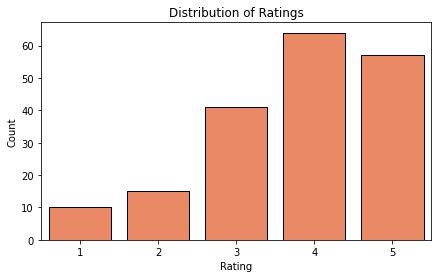

In [31]:
# Distribution of the Ratings
plt.figure(figsize=(7, 4))
sns.countplot(x='rating', data=df, order=sorted(df['rating'].unique()), color=sns.color_palette()[0], edgecolor="black")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

We clearly see in this plot that the majority of reviews has a positive rating with 3 or more "stars".

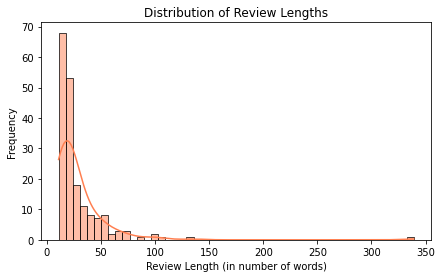

In [32]:
# Distribution of the review lengths
plt.figure(figsize=(7, 4))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (in number of words)')
plt.ylabel('Frequency')
plt.show()

In the plot of the review lengths, we can identify that most of the reviews have a length (including title, pros and cons) of around 10 to 20 words. But we can also identify an outlier with around 340 words. We will treat this outlier separatly in order to not distort our further analysis when working with the Review Length. Outliers can significantly affect the visualization and interpretation of the data. A common method to detect outliers is the IQR (interquartile range) method. In the IQR method, any value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier, where Q1 and Q3 are the first and third quartiles, respectively, and IQR = Q3 - Q1. When we detected the outlier, we can just remove it from the data set (but just for the review length analyses) because it is only one data point and we won't lose much information when filtering it out.

In [33]:
# Calculate Q1, Q3, and IQR
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['review_length'] >= lower_bound) & (df['review_length'] <= upper_bound)]

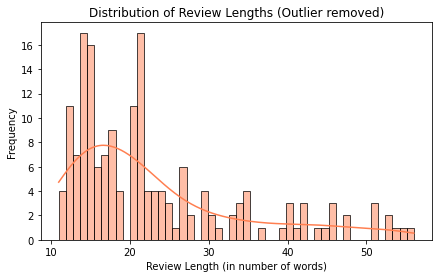

In [34]:
# Show the same plot, distribution of review lengths, but without the outlier
plt.figure(figsize=(7, 4))
sns.histplot(df_filtered['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths (Outlier removed)')
plt.xlabel('Review Length (in number of words)')
plt.ylabel('Frequency')
plt.show()

We can see that removing the outlier enables us to have a much clearer and detailed visualization of the data distributions as the data is not compressed on the x-axis to show to outlier. Now we will also have a look the the text lengths for the title, pros and cons of each review. This can help us understand if there are significant differences in the length of different parts of the reviews, which might suggest different levels of emphasis or attention given by the reviewers.

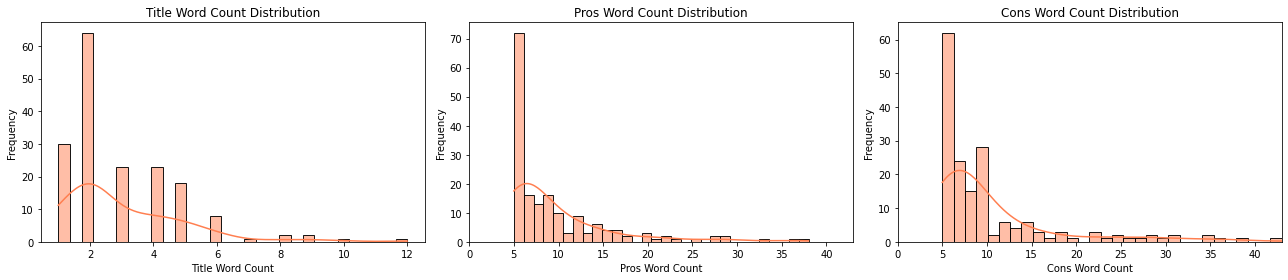

In [35]:
# Create a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot title length distribution
sns.histplot(data=df_filtered, x='title_length', bins=30, color=sns.color_palette()[0], ax=axes[0], kde=True)
axes[0].set_title('Title Word Count Distribution')
axes[0].set_xlabel('Title Word Count')
axes[0].set_ylabel('Frequency')

# Plot pros length distribution
sns.histplot(data=df_filtered, x='pros_length', bins=30, color=sns.color_palette()[0], ax=axes[1], kde=True)
axes[1].set_title('Pros Word Count Distribution')
axes[1].set_xlabel('Pros Word Count')
axes[1].set_ylabel('Frequency')

# Plot cons length distribution
sns.histplot(data=df_filtered, x='cons_length', bins=30, color=sns.color_palette()[0], ax=axes[2], kde=True)
axes[2].set_title('Cons Word Count Distribution')
axes[2].set_xlabel('Cons Word Count')
axes[2].set_ylabel('Frequency')

# To make x-axis same for both pros and cons
max_pros_cons = max(df_filtered['pros_length'].max(), df_filtered['cons_length'].max())
axes[1].set_xlim([0, max_pros_cons])
axes[2].set_xlim([0, max_pros_cons])

plt.tight_layout()
plt.show()

We can see that the title mainly contains 2 words, which is not surprising, since a title is usually supposed to be concise. For the word counts of the pros and cons texts, we see that there is not really difference between both distributions, suggesting that the employees in general do not favor one of these text fields over the other.

### Relationship between Rating and text length

In this aspect we want to check whether there is a relationship between the rating of a review and the length of the different review components, following the idea that an employee who is assigning a negativ review might write less positive but more negative text or employees who write longer reviews in general are less satisfied and want to critizise the company. Therefore we can calculate the correlation coefficient, which is a good way to quantify the linear relationship between two variables.

In [36]:
# Check the correlation between 'rating' and the lengths of 'title', 'pros', 'cons'
correlations = df_filtered[['rating', 'review_length', 'title_length', 'pros_length', 'cons_length']].corr()

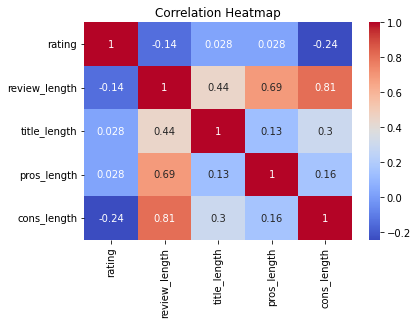

In [37]:
# Visualize these correlations using a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation coefficient ranges from -1 to 1. A value closer to -1 indicates a strong negative correlation, a value closer to 1 indicates a strong positive correlation, and a value closer to 0 indicates no correlation.

Obviously, we see that there is a high correlation between the review length of the whole review (which is just the composition of title, pros and cons) and the length of pros, cons and the title which is self-explanatory. But we are interested in the correlation between the rating and the other variables. Here we see that there exists no linear relationship between the rating and the title and pros length.

However, there is a negative correlation between the rating and the cons length. This can be interpreted as when an employee writes more text for the cons section of the review, the overall rating he gives will be worse, which also aligns with the second part of our hypothesis. But writing more positive text does not lead to a linear increase of the rating. There is also a small negative correlation between the rating and the review length overall, indicating that the more an employee writes the worse the rating, however we have to be careful with this interpretation as this might just reflect the impact of the negative correlation of the cons length and rating as we showed before and we know that the review length as a whole includes the cons section.

In addition, correlation does not imply causation. Even if we find a strong correlation between cons length and rating, it does not necessarily mean that writing more negative text causes lower job satisfaction, it just means that they are associated. There could be other underlying factors causing both to occur.

We can now also show this relationship using a scatterplot where each dot represents a review. The x-coordinate of the dot is the length of the review, and the y-coordinate is the rating. The line in the plot is the best fit linear regression line. If your hypothesis, that people who write more are in general less satisfied, is correct, we should expect to see a negative slope, suggesting that longer reviews tend to have lower ratings. The alpha parameter for the scatter plot is set to 0.3 for better visibility when data points overlap.

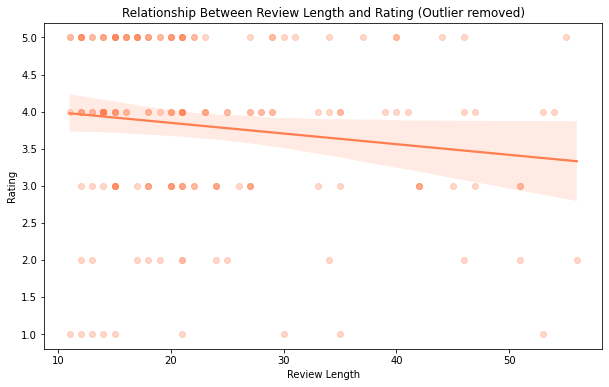

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(x='review_length', y='rating', data=df_filtered, scatter_kws={'alpha':0.3}, color=sns.color_palette()[0])
plt.title('Relationship Between Review Length and Rating (Outlier removed)')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

Now we can also have a closer look at the distribution of the text length compared to the specific ratings using boxplots.

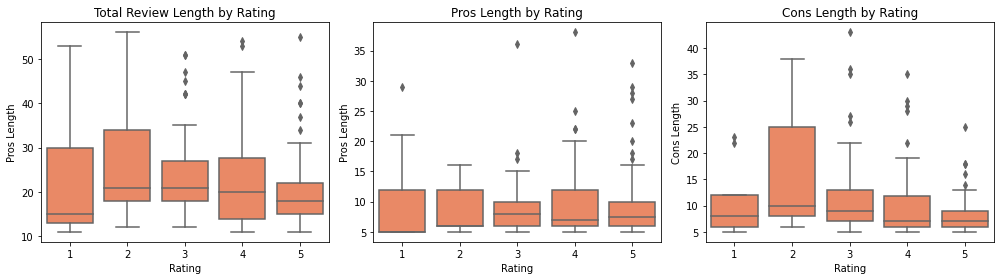

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.boxplot(x='rating', y='review_length', data=df_filtered, ax=ax[0],  color=sns.color_palette()[0])
ax[0].set_title('Total Review Length by Rating')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Pros Length')

sns.boxplot(x='rating', y='pros_length', data=df_filtered, ax=ax[1], color=sns.color_palette()[0])
ax[1].set_title('Pros Length by Rating')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Pros Length')

sns.boxplot(x='rating', y='cons_length', data=df_filtered, ax=ax[2], color=sns.color_palette()[0])
ax[2].set_title('Cons Length by Rating')
ax[2].set_xlabel('Rating')
ax[2].set_ylabel('Cons Length')

plt.tight_layout()
plt.show()

Here we can see that it looks like nearly all reviews have the same length independent of the rating. However, there is a slight tendency that negativ reviews with the rating of 1 have less text and reviews with a rating of 2 have more text. This could perhaps be due to the fact that employees who are so dissatisfied that they give a rating of 1 do not want to invest effort in a review, whereas employees who give a rating of 2 may be dissatisfied, but at least still want to criticize the company, perhaps in hope that the company will improve.

If we have a look at the specific length of the positive text, we can see that people tend to write less positive text if they rated the company with 1 which is self-explanatory and for the negative text, we can see that people generally write and slightly less if the review was positive, but they tend to write especially much negative text when they rated the company with a 2.

### Development of Job Ratings over Time

Next we are interested how the job ratings evolved over time and whether we can identify a clear trend.

Firstly, we group the data by date (to the nearest month), and for each month, we calculate the mean of the 'rating' values, thereby yielding the average monthly rating. However, as our dataset may not include reviews for every single month, it's likely that we have some missing values in our time series. 

To address this, we use a method called **interpolation**, which estimates the missing values based on the surrounding data. In this case, we employ 'linear' interpolation, which assumes a straight-line relationship between the points before and after the missing data. To distinguish between our original data and the interpolated data, we plot both on the graph, using distinct colors and marker styles. This gives a clear visual representation of the missing data and how it has been estimated.

As a next step, we fit a **Linear Regression model** to our time series of average monthly ratings. The purpose here is to identify a potential trend in our data over time. We plot the resulting regression line on our graph, providing a visual representation of this trend.

Since a pure consideration of the average ratings may lead to wrong conclusions, because for example there was only one review in a month with a rating of 1 and might be not representative for a whole "bad" month, we also take into account the number of reviews of each month. To visualize this, we plot the number of reviews each month as a bar chart on a secondary y-axis. This allows us to correlate the trends in the average monthly rating with the number of reviews, providing a more comprehensive view of the data.

The graph, thus, offers an intuitive way to understand how the reviews and ratings have evolved over time, helping to identify any temporal patterns or trends that might be present in our data

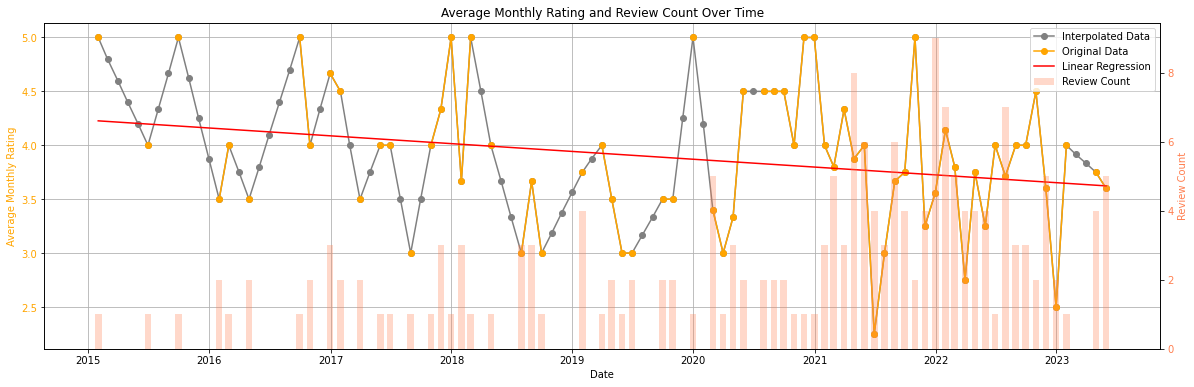

In [40]:
# Group by date (to the month) and calculate the average rating
average_ratings_monthly = df.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean()

# Count the number of reviews per month
review_counts_monthly = df.groupby(pd.Grouper(key='date', freq='M')).size()

# Create a copy of original data before interpolation
average_ratings_monthly_before_interpolation = average_ratings_monthly.copy()

# Interpolate missing values
average_ratings_monthly.interpolate(method='linear', inplace=True)

# Define marker style and color for original and interpolated data
marker_style = dict(linestyle='-', marker='o', markersize=6)
original_marker_color = 'orange'
interpolated_marker_color = 'gray'

# Create a figure and a single axis
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot the interpolated data
ax1.plot(average_ratings_monthly.index, average_ratings_monthly.values,
         color=interpolated_marker_color, 
         label='Interpolated Data',
         **marker_style)

# Overlay the original data
ax1.plot(average_ratings_monthly_before_interpolation.index, 
         average_ratings_monthly_before_interpolation.values,
         color=original_marker_color, 
         label='Original Data',
         **marker_style)

# Fit a Linear Regression model
X = mdates.date2num(average_ratings_monthly.index.to_pydatetime()).reshape(-1, 1)  # Convert dates to numerical format for regression
y = average_ratings_monthly.values
model = LinearRegression()
model.fit(X, y)

# Generate predicted ratings
y_pred = model.predict(X)

# Plot the regression line
ax1.plot(average_ratings_monthly.index, y_pred, color='red', label='Linear Regression') 

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Monthly Rating', color=original_marker_color)
ax1.tick_params(axis='y', labelcolor=original_marker_color)
ax1.grid(True)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.bar(review_counts_monthly.index, review_counts_monthly.values, 
        width=20, align='center', color=sns.color_palette()[0], alpha=0.3, label='Review Count')
ax2.set_ylabel('Review Count', color=sns.color_palette()[0])
ax2.tick_params(axis='y', labelcolor=sns.color_palette()[0])

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title('Average Monthly Rating and Review Count Over Time')
plt.savefig('plots/monthly_rating_over_time.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

The red line in the plot shows the trend line from the linear regression, so we can see a slight negative trend of the review ratings. However, the result is not really reliable, as we only have few data and we would have to validate this using more data. We also see that in the years of 2015 till 2021 only there have bene significantly less reviews submitted than from 2021 on, which may be due to the increasing presence of the job platform as well as general digitization.

### Further Temporal Trend Analysis

Next we want to check whether the rating might depend on other time related information like the month or the weekday. Since the rating is a ordinal feature, we will use barplots for this.

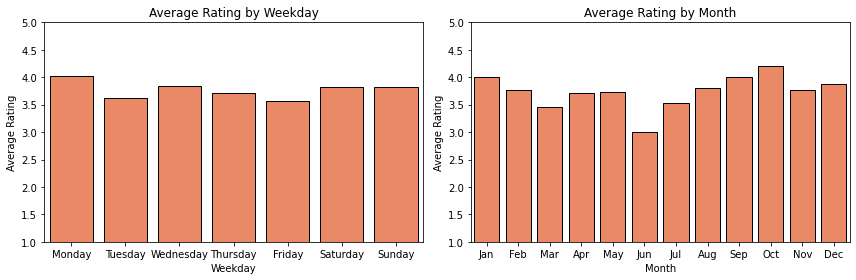

In [41]:
# Extract month and weekday from date and map them to their names
df['month'] = df['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df['weekday'] = df['date'].dt.weekday.apply(lambda x: calendar.day_name[x])

# Define the order of months and weekdays
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
weekday_order = [calendar.day_name[i] for i in range(7)]

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting average rating by weekday
sns.barplot(x='weekday', y='rating', data=df, ci=None, ax=axes[0], color=sns.color_palette()[0], edgecolor="black", order=weekday_order)
axes[0].set_title('Average Rating by Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Average Rating')
axes[0].set_ylim(1, 5)  # To set y-axis limits for better comparison

# Plotting average rating by month
sns.barplot(x='month', y='rating', data=df, ci=None, ax=axes[1], color=sns.color_palette()[0], edgecolor="black", order=month_order)
axes[1].set_title('Average Rating by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Rating')
axes[1].set_ylim(1, 5)  # To set y-axis limits for better comparison

plt.tight_layout()
plt.show()

We see that there is not really a temporal dependence on neither the weekdays nor the months. Only exception might be June, where the average rating dropped a bit lower than the other months. This however, might not be really respresentative, as there might be just less reviews in this month and therefore not giving this any statistical relevance. But verify this, we plot the amount of posted reviews over the above time features.

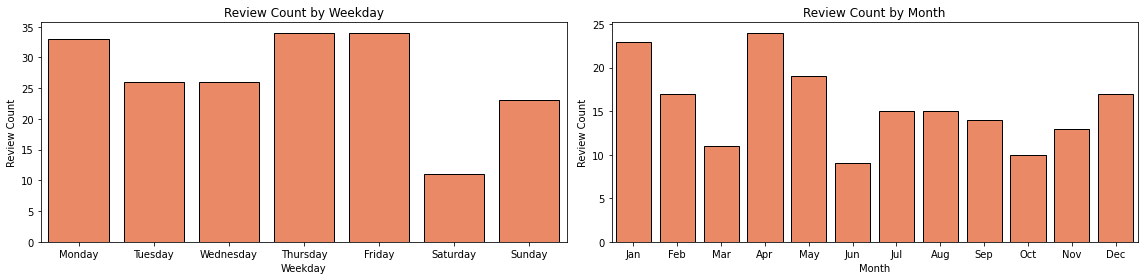

In [42]:
# Group by 'weekday' and 'month' and count the reviews
reviews_per_weekday = df.groupby('weekday').size().reset_index(name='review_count')
reviews_per_month = df.groupby('month').size().reset_index(name='review_count')

# Define the order of months and weekdays
weekday_order = [calendar.day_name[i] for i in range(7)]
month_order = [calendar.month_abbr[i] for i in range(1, 13)]

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plotting review count by weekday
sns.barplot(x='weekday', y='review_count', data=reviews_per_weekday, ax=axes[0], color=sns.color_palette()[0], edgecolor="black", order=weekday_order)
axes[0].set_title('Review Count by Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Review Count')

# Plotting review count by month
sns.barplot(x='month', y='review_count', data=reviews_per_month, ax=axes[1], color=sns.color_palette()[0], edgecolor="black", order=month_order)
axes[1].set_title('Review Count by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Review Count')

plt.tight_layout()
plt.show()

As we already assumed, the average number of reviews is significantly lower in June compared to some other months, so there might be no real relationship between the rating a specific month. However, we can see that on Saturedays employees tend to be writing less reviews and on average the most reviews are written in Januare and April.

## 4. Lasso Regression: Determine which terms in the job reviews drive the rating

In this part, we want to determine which terms in our data drives the rating of the job reviews. Lasso Regression is a popular choice for this kind of problem due to its inherent ability to perform feature selection. By including a penalty for the number of features used in the model, Lasso Regression can help identify the most significant terms in predicting the job review ratings.

### Unigram Analysis

In our analysis, we first apply Lasso regression on unigrams. Lasso regression is a type of linear regression that uses shrinkage, where data values are shrunk towards a central point, like the mean. The main advantage of Lasso regression is its ability to perform feature selection by reducing the coefficients of unimportant features to zero, making it a very useful tool for this project where we are trying to find which terms in the review text are most predictive of the review ratings.

The hyperparameter of the Lasso model, alpha, controls the amount of shrinkage: the larger the value of alpha, the greater the amount of shrinkage and thus the more coefficients are reduced to zero. We optimize the value of alpha by using cross-validation, specifically LassoCV, which automatically performs cross-validation on a range of alpha values to find the optimal one.

In [43]:
# Let's start with the unigram term-document matrix
X_unigram = unigram_tfidf_df.values

# Create a LassoCV object
lasso_cv = LassoCV(cv=10, random_state=42)

# Fit the Lasso model on the entire dataset
lasso_cv.fit(X_unigram, df['rating'])

# Print the optimal alpha value
print("Optimal alpha value: ", lasso_cv.alpha_)

# Get the feature names and coefficients into a DataFrame
feature_coeffs_cv = pd.DataFrame({
    'Feature': unigram_tfidf_vectorizer.get_feature_names_out(),
    'Coefficient': lasso_cv.coef_
})

Optimal alpha value:  0.005951101767243313


Now we take a look at the largest and smallest 10 coefficients of the lasso regressions, as those words drive the regression and therefore the rating.

In [44]:
# Display the top 10 features with the highest coefficients
print(feature_coeffs_cv.sort_values(by='Coefficient', ascending=False).head(10))

         Feature  Coefficient
409          top     1.533200
183          gut     1.083547
27   arbeitszeit     0.963783
394        super     0.881282
408         toll     0.819240
274     manchmal     0.716477
16   arbeitgeber     0.694676
424  unternehmen     0.416845
441         very     0.385031
295   nachhaltig     0.189590


In [45]:
# Display the top 10 features with the lowest coefficients
print(feature_coeffs_cv.sort_values(by='Coefficient').head(10))

        Feature  Coefficient
361    schlecht    -2.442761
191  hierarchie    -2.132379
256      leicht    -1.683661
306         not    -1.451813
229       klein    -1.400787
131  experience    -1.297897
324      people    -1.182725
257      leider    -1.071632
470    wirklich    -0.937237
329  persönlich    -0.695967


This approach, using cross-validation to find the optimal alpha value, is generally more robust and helps prevent overfitting the model to the data. The selected features via this method are the ones that the model finds most indicative of the review rating, based on the data.

The terms that have the most positive effect on the rating are 'top', 'gut', 'arbeitzeit', 'super', and 'toll'. This makes intuitive sense, as these words are generally associated with positive experiences and feelings. So if a review contains one of these words, it's likely that the rating is good.

On the other hand, the terms that have the most negative effect on the rating are 'schlecht', 'hierarchie', 'leicht' (might imply lack of challenge). These terms might be associated with elements of the job that employees are dissatisfied with.

We should note that Lasso regression assumes a linear relationship between the predictors (terms) and the target variable (rating). If these assumptions do not hold, the results may not accurately reflect the relationships in the data. Also, the terms are interpreted in the context of the presence of other terms in the model. Therefore, while a term might be strongly predictive in the current model, its predictive power might change if the model were retrained with a different set of terms.

### Bigram Analysis
Next, we apply a similar analysis to bigrams (two-word phrases) in the review text. However, in this case, when we used the same LassoCV approach, we found that it led to an output where the coefficients of nearly all bigrams were reduced to zero. This is likely because the relatively high-dimensional nature of bigrams and the small number of reviews lead the cross-validation process to favor a very simple model to avoid overfitting.

Given the specifics of this project, where we aim to identify which terms or phrases are most associated with the review rating, having all coefficients be zero is not very informative. Therefore, we chose to set the alpha parameter manually in this case, balancing between complexity and predictive power.

In [46]:
# Let's start with the bigram term-document matrix
X_bigram = bigram_tfidf_df.values

# Create a LassoCV object
lasso_cv_bigrams = LassoCV(cv=10, random_state=42, max_iter=5000)

# Fit the Lasso model on the entire dataset
lasso_cv_bigrams.fit(X_bigram, df['rating'])

# Print the optimal alpha value
print("Optimal alpha value: ", lasso_cv_bigrams.alpha_)

# Get the feature names and coefficients into a DataFrame
feature_coeffs_cv_bigrams = pd.DataFrame({
    'Feature': bigram_tfidf_vectorizer.get_feature_names_out(),
    'Coefficient': lasso_cv_bigrams.coef_
})

Optimal alpha value:  0.0204438746865402


In [47]:
# Display the top 10 features with the highest and lowest coefficients
print(feature_coeffs_cv_bigrams.sort_values(by='Coefficient', ascending=False).head(10))
print(feature_coeffs_cv_bigrams.sort_values(by='Coefficient').head(10))

               Feature  Coefficient
0      alt mitarbeiter         -0.0
57  interessant arbeit          0.0
83      service center         -0.0
82  schlecht bezahlung         -0.0
81         neu aufgabe          0.0
80      netter kollege          0.0
79       nette kollege          0.0
78           nett team         -0.0
77    nett mitarbeiter          0.0
76        nett kollege         -0.0
                    Feature  Coefficient
0           alt mitarbeiter         -0.0
81              neu aufgabe          0.0
80           netter kollege          0.0
79            nette kollege          0.0
78                nett team         -0.0
77         nett mitarbeiter          0.0
76             nett kollege         -0.0
75  möglichkeit entwicklung          0.0
74         mobiles arbeiten         -0.0
73          mitarbeiter gut         -0.0


In [48]:
# Create the Lasso object, but set the alpha parameter manually
lasso = Lasso(alpha=0.01)

# Fit the Lasso model on the entire dataset
lasso.fit(X_bigram, df['rating'])

# Get the feature names and coefficients into a DataFrame
bigram_feature_coeffs = pd.DataFrame({
    'Feature': bigram_tfidf_vectorizer.get_feature_names_out(),
    'Coefficient': lasso.coef_
})

In [49]:
# Display the 10 features with highest positive coefficients
print(bigram_feature_coeffs.sort_values(by='Coefficient', ascending=False).head(10))

                    Feature  Coefficient
37          gut arbeitgeber     0.599617
99         toll arbeitgeber     0.445337
35         groß unternehmen     0.328280
38            gut bezahlung     0.159536
57       interessant arbeit     0.137767
0           alt mitarbeiter    -0.000000
78                nett team    -0.000000
77         nett mitarbeiter     0.000000
75  möglichkeit entwicklung     0.000000
74         mobiles arbeiten    -0.000000


In [50]:
# Display the 10 features with highest negative coefficients
print(bigram_feature_coeffs.sort_values(by='Coefficient').head(10))

                  Feature  Coefficient
88    sicher arbeitsplatz    -0.825232
16  fehlend wertschätzung    -0.688329
58    interessant aufgabe    -0.656787
82     schlecht bezahlung    -0.650803
89             sicher job    -0.598083
86              should be    -0.499716
97               the best    -0.158396
55            home office    -0.125206
76           nett kollege    -0.076084
65   komplex organisation     0.000000


The positive coefficients represent the terms (in this case, bigrams) that are associated with higher ratings. For example, 'gut arbeitgeber' and 'toll arbeitgeber' have the highest positive coefficients, suggesting that when these terms are present in a review, the review is likely to have a higher rating. Other terms like 'groß unternehmen' and 'gut bezahlung' are also positively associated with the rating.

On the other hand, the negative coefficients represent the terms that are associated with lower ratings. The terms 'sicher arbeitsplatz', 'fehlend wertschätzung' , 'interessant aufgabe', and 'schlecht bezahlung' have the highest negative coefficients. This suggests that when these terms appear in a review, they are likely to be associated with a lower rating.

Also, it's important to note that English terms like 'should be' and 'the best' appeared in the negatively associated bigrams. It could indicate that the usage of English in reviews is associated with lower ratings or these specific phrases are used in a negative context. It's also worth mentioning that a large number of terms have a coefficient of zero, indicating that these terms are not contributing to the prediction of the rating. These are the terms that the Lasso regression has essentially deemed irrelevant for predicting the review rating.

This approach gives us more control over the complexity of the model and allows us to retain more features for interpretability. However, it's important to keep in mind that this might make the model more susceptible to overfitting, and the features selected might not generalize as well to new, unseen data.

## 5. Topic Modeling

To identify major concerns employees have when writing a negative review, we use topic modeling. 

Topic modeling is a type of statistical modeling for discovering the abstract 'topics' that occur in a collection of documents. In essence, it is an unsupervised machine learning technique used to categorize large volumes of text data into a predefined number of topics. These topics represent a set of words that are representative of the main theme within the collection.

For our project, topic modeling is immensely useful as it can help us identify the major themes and concerns present in the employee reviews. Given that our dataset contains free-text 'pros' and 'cons' fields, the themes identified through topic modeling can help us understand what areas employees frequently mention as positive or negative. This information, in turn, can be valuable for BASF to understand areas of strength and improvement, and can guide interventions to enhance employee satisfaction.

For that, we first filter our data to only negative reviews and focus on the "cons" as this text contains the negative aspects of the review. We define a negative review as a review with a rating of 3 or lower.

In [51]:
# Filter reviews
df_negative = df[df['rating'] <= 3]

# Prepare the text data
data = df_negative['cons'].values.tolist()

# Preprocess the data
processed_data = [preprocess_text(doc).split() for doc in data]

# Create a dictionary and corpus required for LDA
id2word = corpora.Dictionary(processed_data)
texts = processed_data
corpus = [id2word.doc2bow(text) for text in texts]

We are now ready to perform a topic modeling on our filtered data. One popular algorithm for this is **Latent Dirichlet Allocation (LDA)**. In Python, we can use the gensim library for this. Latent Dirichlet Allocation (LDA) is a generative statistical model widely used in Natural Language Processing (NLP) to extract hidden topics from large volumes of text data. The term 'Latent' signifies hidden topics that the model will learn, 'Dirichlet' is a type of probability distribution that the model uses, and 'Allocation' refers to the assignment of topics to the documents.

LDA is based on two fundamental assumptions:

1. Documents are probability distributions over latent topics: This means that each document can be represented as a mixture of a certain number of topics.

2. Topics are probability distributions over words: This means that each topic is characterized by a distribution of words.

In simple terms, if we have a collection of documents (corpus), LDA assumes that these documents were generated in the following way:

- For each document, choose a distribution over topics.
- For each word in the document, choose a topic from the distribution over topics, and then choose a word from that topic's distribution over words.
- When given a corpus of documents, LDA infers the original distributions over topics and words that most likely generated the documents.

One of the key parameters in an LDA model is the number of topics. However, there's no easy way to decide the 'correct' number of topics. Here, we determine the optimal number of topics using a metric called the Coherence Score.

The **Coherence Score** is a measure of the quality of the learned topics. It calculates the similarity between high scoring words within each topic, which gives a sense of how interpretable and meaningful a topic is. The assumption here is that more similar words form a topic that is more interpretable and thus of higher quality.

In our process, we build several LDA models with a different number of topics and compare their Coherence Scores. We choose a range of potential topic quantities, each time building a new model and calculating its coherence. By plotting these coherence scores against the number of topics, we can visually inspect where the increase in coherence score slows down (a point of diminishing returns), which suggests the optimal number of topics, which is in this case 4.

In [52]:
# Use coherence score to determine optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

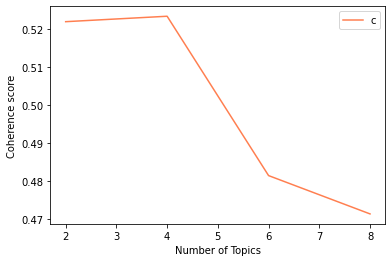

In [53]:
# Use this function to determine the optimal number of topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=10, step=2)
# Plot coherence values to visualize the optimal number of topics
limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
# Select the model with highest coherence value
optimal_model = model_list[coherence_values.index(max(coherence_values))]
# Now, let's print the most probable words for each topic
for idx, topic in optimal_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.026*"wenig" + 0.020*"Gehalt" + 0.012*"The" + 0.012*"vieler" + 0.012*"Wertschätzung" + 0.011*"hoch" + 0.011*"Mitarbeiter" + 0.011*"schlecht" + 0.007*"--" + 0.006*"Automation"
Topic: 1 
Words: 0.020*"--" + 0.010*"Mitarbeiter" + 0.010*"Abteilung" + 0.009*"schlecht" + 0.006*"Struktur" + 0.006*"Firma" + 0.006*"ganz" + 0.006*"kaum" + 0.006*"eck" + 0.006*"More"
Topic: 2 
Words: 0.015*"Gehalt" + 0.010*"vieler" + 0.009*"Struktur" + 0.009*"Mitarbeiter" + 0.009*"Starre" + 0.008*"persönlich" + 0.007*"gehen" + 0.006*"Entwicklung" + 0.006*"Hierarchie" + 0.006*"Personal"
Topic: 3 
Words: 0.013*"Mitarbeiter" + 0.011*"vieler" + 0.009*"Gehalt" + 0.009*"Kollege" + 0.008*"wenig" + 0.008*"Team" + 0.007*"Vergleich" + 0.007*"hoch" + 0.007*"Hierarchie" + 0.006*"klein"


The numbers before the words represent the weights (probabilities) of those words within each topic. These weights represent how important a keyword is to that topic.

A possible interpretation of our results and topic titles are:

1. **Topic 0 - "Wages and Valuation"**: This topic seems to be about wages and how much employees feel they are valued within the company. Key words such as "wenig", "Gehalt", "Wertschätzung", "hoch", and "schlecht" suggest employees may feel they are undervalued and are dissatisfied with their wages.

2. **Topic 1 - "Work Structure and Environment"**: This topic seems to relate to the company's work structure and general environment. Words like "--", "Mitarbeiter", "Abteilung", "schlecht", "Struktur", "Firma" suggest that employees might be expressing discontent with the company's organizational structure and the overall environment within their department or the company as a whole.

3. **Topic 2 - "Professional Growth and Work Structure"**: This topic seems to focus on professional development and hierarchical issues. Words like "Gehalt", "Struktur", "Mitarbeiter", "Starre", "persönlich", "gehen", "Entwicklung", "Hierarchie", "Personal" suggest a possible dissatisfaction with career growth opportunities, the rigid structure, and hierarchy within the company.

4. **Topic 3 - "Teamwork and Work Culture"**: This topic appears to focus on the interpersonal relationships between employees and the overall work culture. The presence of words like "Mitarbeiter", "vieler", "Gehalt", "Kollege", "wenig", "Team", "Vergleich", "hoch", "Hierarchie", "klein" might imply employees' views on teamwork, salary comparisons, and issues within the hierarchy that affect the team dynamic.

## 6. Automated Responses

We now want to create a methodology for writing suitable response to negative reviews. As the topic of this seminar is "Generative AI" we want to automate this process and let GPT-3 write the response automatically. 

First we write a function that takes a review text (to be more specific the "cons" of a review) as input and preprocesses it, and then predicts the topic. We will use the LDA model we previously trained to predict the topic for the review. We also give each of our topcis a topic title as already introduced above. Of course this title is highly subjective, but we tried to summarize the words of the topic in the most meaningful way. Furthermore we define a low threshold (0.01) when the topic sum is too low. This should be the case for review contents that make no sense at all. In this case, no topic is predicted and a different prompt is sent to GPT3.

In [70]:
topic_names = {
    0: "Gehälter und Wertschätzung",
    1: "Arbeitstruktur und Arbeitsumgebung",
    2: "Berufliche Entwicklung und Arbeitsstruktur",
    3: "Teamarbeit und Arbeitskultur"
}

In [71]:
def predict_topic(review_text, lda_model, dictionary):
    # Preprocess the text
    processed_review = preprocess_text(review_text).split()
    
    # Only keep the words that are in the dictionary
    processed_review = [word for word in processed_review if word in dictionary.token2id]
    
    try:
        bow_vector = dictionary.doc2bow(processed_review)
        topic_prediction = lda_model.get_document_topics(bow_vector)
    except IndexError:
        return "Out of Bounds"
    
    # Check if the topic probabilities sum is below 0.01
    topic_prob_sum = sum([prob for topic, prob in topic_prediction])
    if topic_prob_sum < 0.01:
        return "No topic"

    # get the topic that has the highest probability
    max_prob = max(topic_prediction, key=lambda item: item[1])

    # return the topic number with highest probability
    return max_prob[0]

The predict_topic() function will return the topic number that has the highest probability for a given review text. We are now able to assign each review content a topic. This topic will be integrated in our GPT3 prompt. Now we define a function that uses OpenAI's GPT-3 to generate a response. The function generate_response() calls predict_topic() and then generates a prompt for GPT-3 that includes the topic title, the most dominant topic words, and the review text.

In [90]:
with open('OPENAI_API_KEY.txt', 'r') as file:
    openai_api_key = file.read().strip()
    
openai.api_key = openai_api_key

def generate_response(review_text, lda_model, dictionary, topic_names):
    # Predict the topic
    topic_num = predict_topic(review_text, lda_model, dictionary)
    
    if topic_num == "No topic":
        prompt = f"Ein Mitarbeiter hat eine negative Bewertung über das Unternehmen abgegeben. Das Thema konnte nicht kategorisiert werden. Es wurde jedoch folgender Kommentar abgegeben: '{review_text}'. Bitte geben Sie eine kurze, hilfreiche Antwort als Vertreter des Unternehmens."
    elif topic_num == "Out of Bounds":
        prompt = f"Ein Mitarbeiter hat eine negative Bewertung über das Unternehmen abgegeben. Der Kommentar des Mitarbeiters lautet wie folgt:\n\n'{review_text}'\n\n Bitte geben Sie eine kurze, allgemeine Antwort als Vertreter des Unternehmens."
    else:
        # Get topic title
        topic_title = topic_names[topic_num]

        # Get most dominant topic words for this topic
        topic_words = ', '.join([word for word, prob in lda_model.show_topic(topic_num)])

        # Create the prompt for GPT-3
        prompt = f"Ein Mitarbeiter hat eine negative Bewertung des Unternehmens in Bezug auf '{topic_title}' abgegeben. Das Thema kann mit den folgenden Worten beschrieben werden: {topic_words}. Der Kommentar des Mitarbeiters lautet wie folgt:\n\n'{review_text}'\n\nWie würden Sie als Vertreter des Unternehmens auf die Bedenken dieses Mitarbeiters in Form einer kurzen Antwort reagieren?\n\nGeben Sie auch einen kurzen Ratschlag, wie das Unternehmen die angesprochenen Probleme lösen könnte."

    # Use OpenAI's GPT-3 to generate a response
    response = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt,
        max_tokens=250, # Set a maximum of tokens of the response
        n=1, # How often should a response be generated
        temperature=0, # Randomness, the higher the weirder
    )

    return response.choices[0].text.strip()

### Exemplary Usage

Now have a function that can generate a response to a given review text (primarely text that would fit into the "cons" text field) using GPT-3, taking into account the topic of the review as determined by our LDA model.

To use this, we can call the generate_response function with our review text and the trained LDA model, dictionary, and topic names as arguments.

For example, let's say we have the following review text that says:

In [91]:
new_review_text = "Die Arbeitskultur hier ist schrecklich. Es fehlt völlig an Wertschätzung für die Mitarbeiter."

In [92]:
response = generate_response(new_review_text, optimal_model, id2word, topic_names)
print(response)

Als Vertreter des Unternehmens möchten wir uns für die Bedenken des Mitarbeiters bedanken. Wir verstehen, dass es einige Probleme mit der Wertschätzung und dem Gehalt gibt, und wir sind bestrebt, diese Probleme zu lösen.

Unser Rat ist, dass das Unternehmen einige Maßnahmen ergreift, um die Wertschätzung der Mitarbeiter zu verbessern. Dazu gehören die Einführung eines regelmäßigen Feedback-Systems, das Einrichten von Mitarbeiter-Belohnungsprogrammen, die Erhöhung der Gehälter und die Einführung eines Automatisierungssystems, um die Arbeitsbelastung zu reduzieren. Wir sind zuversichtlich, dass diese Maßnahmen dazu beitragen werden, die W


The generate_response function takes the review text, preprocesses it, and predicts the topic using our trained LDA model and dictionary. It then constructs a prompt for GPT-3 that includes the review text and the main points of the predicted topic. This prompt is sent to GPT-3, which generates a response that is returned by the function. If the input is detected as nonsense (i.e., the sum of topic probabilities is less than 0.01), the function sends a different prompt to GPT-3 asking for a general response to a nonsensical review.

As a final reminder, using AI systems to interact with real customers or employees should always be done with caution, as the system might not always generate appropriate responses, and it's crucial to respect privacy and use data responsibly.